# core

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from fastai.vision.all import *

In [ ]:
import pandas as pd

In [ ]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#9) [Path('/home/chris/.fastai/data/pascal_2007/segmentation'),Path('/home/chris/.fastai/data/pascal_2007/test.json'),Path('/home/chris/.fastai/data/pascal_2007/train.json'),Path('/home/chris/.fastai/data/pascal_2007/valid.json'),Path('/home/chris/.fastai/data/pascal_2007/test.csv'),Path('/home/chris/.fastai/data/pascal_2007/models'),Path('/home/chris/.fastai/data/pascal_2007/test'),Path('/home/chris/.fastai/data/pascal_2007/train.csv'),Path('/home/chris/.fastai/data/pascal_2007/train')]

In [ ]:
df = pd.read_csv(path/'train.csv')
df.tail()

fname          labels  is_valid
5006  009954.jpg    horse person      True
5007  009955.jpg            boat      True
5008  009958.jpg  person bicycle      True
5009  009959.jpg             car     False
5010  009961.jpg             dog     False

In [ ]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

In [ ]:
dls.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

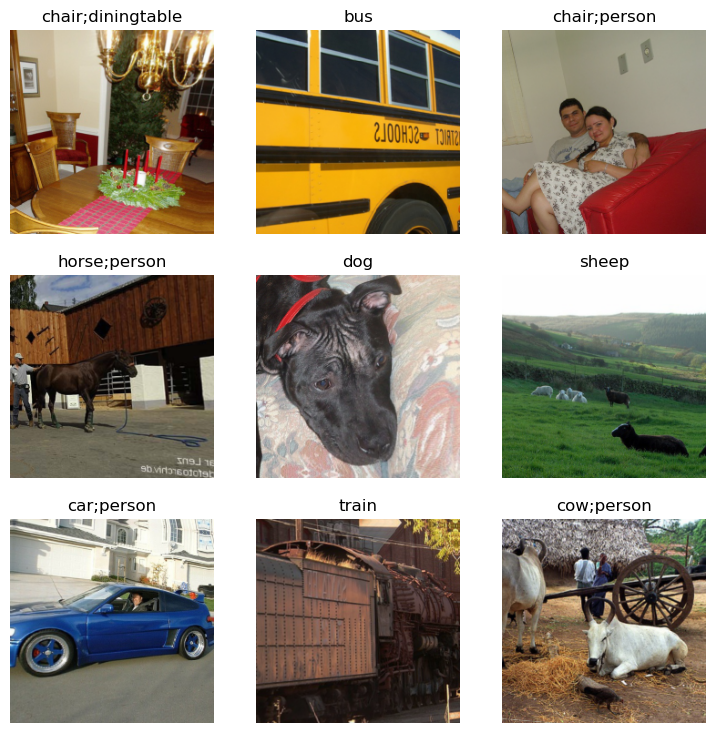

In [ ]:
dls.show_batch()

In [ ]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'
learn = vision_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

/home/chris/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/chris/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


SuggestedLRs(valley=0.0012022644514217973)

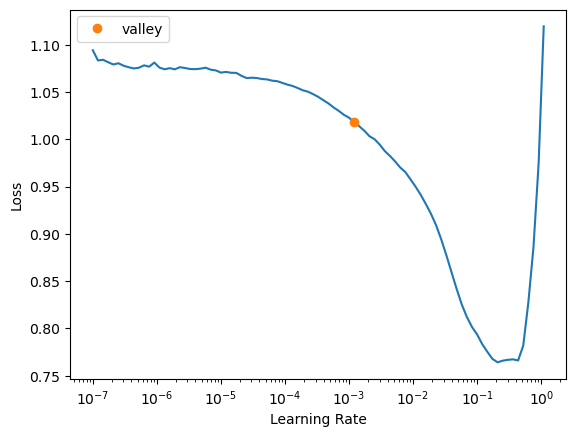

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(1, 3e-2)

In [ ]:
learn.save('model_2')

Path('/home/chris/.fastai/data/pascal_2007/models/model_2.pth')

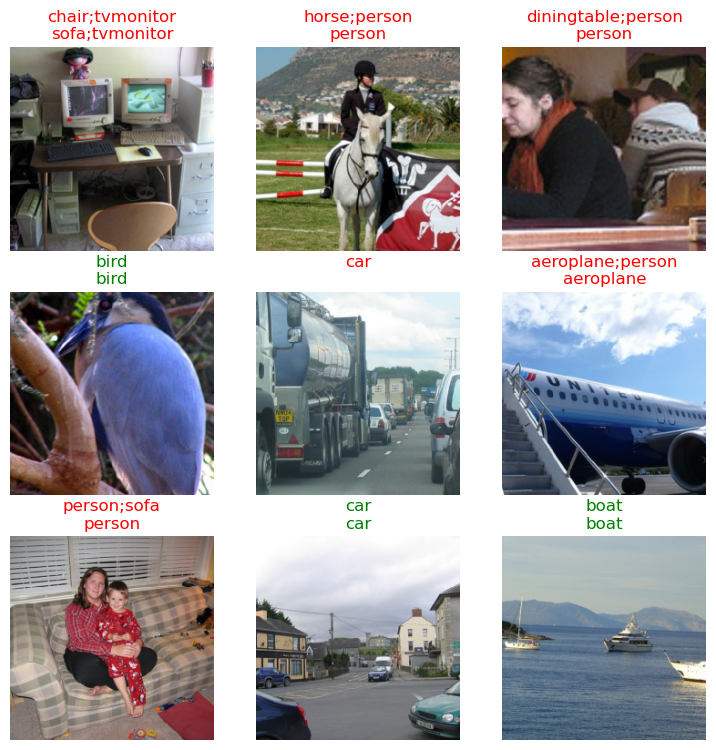

In [ ]:
learn.show_results()

In [ ]:
learn.load('model_2')

<fastai.learner.Learner>

In [ ]:
Path().ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
#| export
learn_inf = load_learner('export.pkl')

In [ ]:
learn.path.ls('train/001324.jpg')

ValueError: Stop argument for islice() must be None or an integer: 0 <= x <= sys.maxsize.

In [ ]:
learn_inf.predict('/home/chris/.fastai/data/pascal_2007/train/001529.jpg')

((#2) ['chair','sofa'],
 TensorBase([False, False, False, False, False, False, False, False,  True,
             False, False, False, False, False, False, False, False,  True,
             False, False]),
 TensorBase([6.3340e-07, 1.9630e-05, 8.5268e-07, 2.4588e-05, 7.7482e-03,
             9.4098e-06, 2.0374e-05, 9.2319e-04, 7.7246e-01, 6.3082e-07,
             1.0262e-01, 5.7578e-04, 1.1140e-06, 1.0604e-06, 2.4385e-02,
             3.6299e-01, 4.8875e-07, 9.6672e-01, 3.0602e-05, 2.6392e-01]))

In [ ]:
learn_inf.dls.vocab

['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [ ]:
#| export
import gradio as gr
categories = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 
              'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 
              'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 
              'sofa', 'train', 'tvmonitor']
def classify_image(img):
    red, idx, probs = learn_inf.predict(img)
    return dict(zip(categories, map(float, probs)))

image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['sheep.PNG', 'chair_diningtable.PNG', 'car_person.PNG']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/home/chris/mambaforge/lib/python3.10/site-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/chris/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/chris/mambaforge/lib/python3.10/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/chris/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App>, 'http://127.0.0.1:7861/', None)

In [ ]:
doc(MultiCategory)

In [ ]:
classify_image('/home/chris/.fastai/data/pascal_2007/train/001529.jpg')

{'aeroplane': 6.334034310384595e-07,
 'bicycle': 1.962980422831606e-05,
 'bird': 8.526779424755659e-07,
 'boat': 2.4587849111412652e-05,
 'bottle': 0.007748179603368044,
 'bus': 9.409790436620824e-06,
 'car': 2.0373518054839224e-05,
 'cat': 0.0009231854928657413,
 'chair': 0.7724562883377075,
 'cow': 6.308166575763607e-07,
 'diningtable': 0.10261747986078262,
 'dog': 0.0005757830222137272,
 'horse': 1.1139674143123557e-06,
 'motorbike': 1.0604229601085535e-06,
 'person': 0.024385178461670876,
 'pottedplant': 0.36299416422843933,
 'sheep': 4.88746366045234e-07,
 'sofa': 0.9667196273803711,
 'train': 3.0602106562582776e-05,
 'tvmonitor': 0.26391857862472534}

In [ ]:
doc(nbdev.nbdev_export)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()